<a href="https://colab.research.google.com/github/Shubham96111/Analysis-of-Cancer-Dataset-/blob/main/Analysis_of_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT PRESENTATION:
#https://drive.google.com/file/d/1UAfVqELTxcS-y-tD7dTCL5HwAAvLJTem/view?usp=sharing

In [ ]:
# imports
import numpy as np 
import pandas as pd

#Training and Testing
from sklearn.model_selection import train_test_split

#Linear Regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

#Boosting
from sklearn import datasets, ensemble                  
from sklearn.ensemble import GradientBoostingRegressor    #Gradient Boosting
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor                          #ExtremeGradient Boosting
from sklearn.ensemble import AdaBoostRegressor            #Adaboosting

#Bagging 
from sklearn.ensemble import BaggingRegressor

#Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORTING THE DATA

In [ ]:
#Importing the data
path="/content/Dataset 13.xlsx"
data=pd.read_excel(path)
data

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
0         61898      260131            11.2   499.748204   (61494.5, 125635]   
1         48127       43269            18.6    23.111234  (48021.6, 51046.4]   
2         49348       21026            14.6    47.560164  (48021.6, 51046.4]   
3         44243       75882            17.1   342.637253    (42724.4, 45201]   
4         49955       10321            12.5     0.000000  (48021.6, 51046.4]   
...         ...         ...             ...          ...                 ...   
3042      46961        6343            12.4     0.000000    (45201, 48021.6]   
3043      48609       37118            18.8   377.175494  (48021.6, 51046.4]   
3044      51144       34536            15.0  1968.959926  (51046.4, 54545.6]   
3045      50745       25609            13.3     0.000000  (48021.6, 51046.4]   
3046      41193       37030            13.9     0.000000  (40362.7, 42724.4]   

      MedianAge  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0          39.3  ...                      NaN                41.6   
1          33.0  ...                     53.8                43.6   
2          45.0  ...                     43.5                34.9   
3          42.8  ...                     40.3                35.0   
4          48.3  ...                     43.9                35.1   
...         ...  ...                      ...                 ...   
3042       44.2  ...                     54.9                44.6   
3043       30.4  ...                     53.3                48.6   
3044       30.9  ...                     52.6                47.8   
3045       39.0  ...                     56.3                49.6   
3046       26.2  ...                     60.3                22.9   

     PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                 32.9                    14.0  81.780529   2.594728   
1                 31.1                    15.3  89.228509   0.969102   
2                 42.1                    21.1  90.922190   0.739673   
3                 45.3                    25.0  91.744686   0.782626   
4                 44.0                    22.7  94.104024   0.270192   
...                ...                     ...        ...        ...   
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468          

In [ ]:
#Checking for Null values
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther


*   There are 34 columns in the data

*   There are three columns in the data that contains null values - PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone.





# CLEANING DATA

In [ ]:
#Cleaning the columns that have null values
data['PctSomeCol18_24']=data["PctSomeCol18_24"].fillna(np.mean(data["PctSomeCol18_24"]))
data['PctEmployed16_Over']=data["PctEmployed16_Over"].fillna(np.mean(data["PctEmployed16_Over"]))
data['PctPrivateCoverageAlone']=data["PctPrivateCoverageAlone"].fillna(np.mean(data["PctPrivateCoverageAlone"]))
data

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
0         61898      260131            11.2   499.748204   (61494.5, 125635]   
1         48127       43269            18.6    23.111234  (48021.6, 51046.4]   
2         49348       21026            14.6    47.560164  (48021.6, 51046.4]   
3         44243       75882            17.1   342.637253    (42724.4, 45201]   
4         49955       10321            12.5     0.000000  (48021.6, 51046.4]   
...         ...         ...             ...          ...                 ...   
3042      46961        6343            12.4     0.000000    (45201, 48021.6]   
3043      48609       37118            18.8   377.175494  (48021.6, 51046.4]   
3044      51144       34536            15.0  1968.959926  (51046.4, 54545.6]   
3045      50745       25609            13.3     0.000000  (48021.6, 51046.4]   
3046      41193       37030            13.9     0.000000  (40362.7, 42724.4]   

      MedianAge  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0          39.3  ...                48.453774                41.6   
1          33.0  ...                53.800000                43.6   
2          45.0  ...                43.500000                34.9   
3          42.8  ...                40.300000                35.0   
4          48.3  ...                43.900000                35.1   
...         ...  ...                      ...                 ...   
3042       44.2  ...                54.900000                44.6   
3043       30.4  ...                53.300000                48.6   
3044       30.9  ...                52.600000                47.8   
3045       39.0  ...                56.300000                49.6   
3046       26.2  ...                60.300000                22.9   

     PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                 32.9                    14.0  81.780529   2.594728   
1                 31.1                    15.3  89.228509   0.969102   
2                 42.1                    21.1  90.922190   0.739673   
3                 45.3                    25.0  91.744686   0.782626   
4                 44.0                    22.7  94.104024   0.270192   
...                ...                     ...        ...        ...   
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468          

In [ ]:
data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            



*   There are two columns, binnedInc and Geography of type object and remaining are of float64 and int64.



In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.shape

(3047, 34)

In [ ]:
#Dropping the columns that are irrelavent to the data
data.drop(['studyPerCap','binnedInc','MedianAgeMale','MedianAgeFemale','Geography','PercentMarried'],axis=1,inplace=True)



*   Dropped the Geography column as it consist of only one type of data in each row.

*   Dropped the studyPerCap as it contains many null (0) values.

*   Dropped the binnedInc column as we already have medianIncome.

*   Dropped the MedianAgeMale and MedianAgeFemale columns as we already has total MedianAge.

*   Dropped the PercentMarried column as we already have Percent of married households.







In [ ]:
num_cols=data.describe(exclude="object")
col_names=num_cols.columns
col_names

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'MedianAge',
       'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [ ]:
#Identifying Outliers
def detect_outlier(col_names,cols):
  outlier_dict={}
  for col in cols:
    q1=np.quantile(col_names[col],0.25)
    q3=np.quantile(col_names[col],0.75)
    iqr=q3-q1
    upper_fence=q3+(1.5*iqr)
    lower_fence=q1-(1.5*iqr)
    outlier=col_names.loc[((col_names[col]<=lower_fence)|(col_names[col]>=upper_fence))][[col]]
    outlier_dict[col]=[q1,q3,iqr,upper_fence,lower_fence,outlier.values]
  return outlier_dict

In [ ]:
outlier=detect_outlier(data, col_names)
df=pd.DataFrame(outlier).set_index(pd.Index(['q1','q3' ,'iqr','upper_fence','lower_fence','outlier']))
df

avgAnnCount  \
q1                                                        76.0   
q3                                                       518.0   
iqr                                                      442.0   
upper_fence                                             1181.0   
lower_fence                                             -587.0   
outlier      [[1397.0], [4025.0], [3438.0], [2265.0], [1390...   

                                              avgDeathsPerYear  \
q1                                                        28.0   
q3                                                       149.0   
iqr                                                      121.0   
upper_fence                                              330.5   
lower_fence                                             -153.5   
outlier      [[469], [1380], [1118], [901], [483], [367], [...   

                                              TARGET_deathRate  \
q1                                                       161.2   
q3                                                       195.2   
iqr                                                       34.0   
upper_fence                                              246.2   
lower_fence                                              110.2   
outlier      [[259.5], [262.1], [254.3], [93.8], [104.8], [...   

                                                 incidenceRate  \
q1                                                       420.3   
q3                                                      480.85   
iqr                                                      60.55   
upper_fence                                            571.675   
lower_fence                                            329.475   
outlier      [[591.0], [234.0], [308.2], [221.5], [303.0], ...   

                                                     medIncome  \
q1                                                     38882.5   
q3                                                     52492.0   
iqr                                                    13609.5   
upper_fence                                           72906.25   
lower_fence                                           18468.25   
outlier      [[74347], [79653], [84309], [80479], [78983], ...   

                                                    popEst2015  \
q1                                                     11684.0   
q3                                                     68671.0   
iqr                                                    56987.0   
upper_fence                                           154151.5   
lower_fence                                           -73796.5   
outlier      [[260131], [843954], [772501], [490945], [2695...   

                                                povertyPercent  \
q1                                                       12.15   
q3                                                        20.4   
iqr                                                       8.25   
upper_fence                                             32.775   
lower_fence                                             -0.225   
outlier      [[34.9], [34.0], [35.8], [33.1], [33.6], [39.3...   

                                                     MedianAge  \
q1                                                        37.7   
q3                                                        44.0   
iqr                                                        6.3   
upper_fence                                              53.45   
lower_fence                                              28.25   
outlier      [[54.4], [24.2], [458.4], [54.7], [57.1], [469...   

                                              AvgHouseholdSize  \
q1                                                        2.37   
q3                                                        2.63   
iqr                                                       0.26   
upper_fence                                               3.02   
lower_fence      

# EDA

**Distribution curve for Dependent Variable**

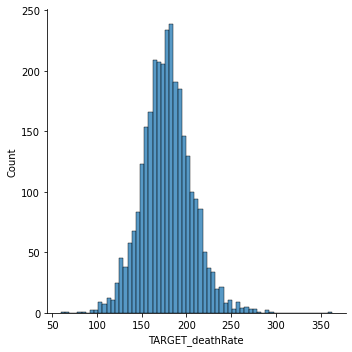

In [ ]:
sns.displot(data['TARGET_deathRate'])



*   The target variable TARGET_deathRate is Normally Distributed.  



**Line plot of MedainAge - TARGET_deathRate** 

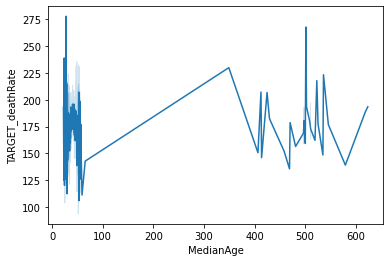

In [ ]:
figsize=(10,10)
sns.lineplot(x='MedianAge',y='TARGET_deathRate',data=data)



*   The count of MedianAge people affected by cancer is mostly below 100.



**Scatter plot of medainIncome - TARGET_deathRate**

In [ ]:
np.corrcoef(data['medIncome'],data['TARGET_deathRate'])

array([[ 1.        , -0.42861493],
       [-0.42861493,  1.        ]])

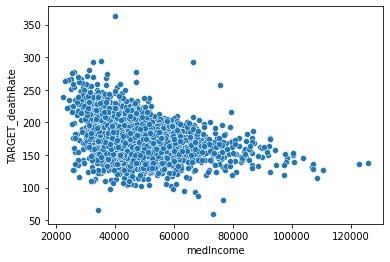

In [ ]:
sns.scatterplot(x='medIncome',y='TARGET_deathRate',data=data)



*   Scatter plot of medIncome shows a high negative correlation with TARGET_deathRate



**Scattter plot of povertyPercent - TARGET_deathRate**

In [ ]:
np.corrcoef(data['povertyPercent'],data['TARGET_deathRate'])

array([[1.        , 0.42938898],
       [0.42938898, 1.        ]])

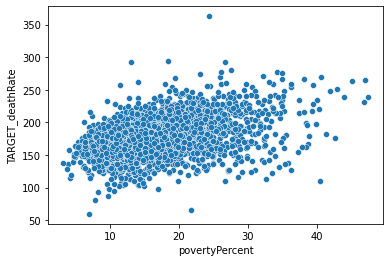

In [ ]:
sns.scatterplot(x='povertyPercent',y='TARGET_deathRate',data=data)



*  Scatter plot of povertyPercent shows a high positive correlation with TARGET_deathRate



**Employed VS Unempolyed**


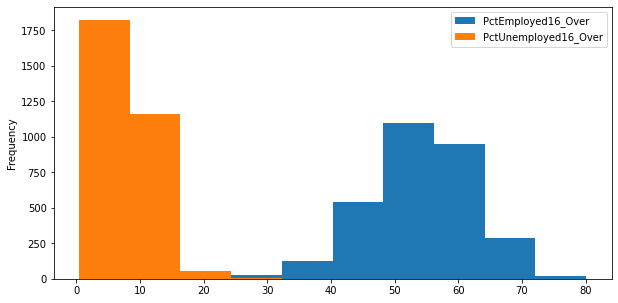

In [ ]:
df=pd.DataFrame(data,columns=['PctEmployed16_Over','PctUnemployed16_Over','TARGET_deathRate'])
df.plot(x='TARGET_deathRate',y=['PctEmployed16_Over','PctUnemployed16_Over'],kind='hist',figsize=(10,5))
plt.show()



*   The percent of residents who are employed are less in rate compared to residents who are unemployed with rescept to TARGET_deathRate



**Coverages Alone**
-Public VS Private

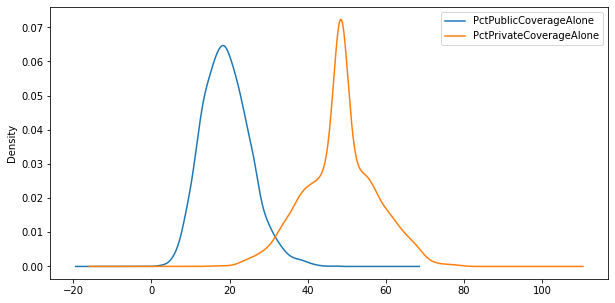

In [ ]:
df=pd.DataFrame(data,columns=['PctPublicCoverageAlone','PctPrivateCoverageAlone','TARGET_deathRate'])
df.plot(x='TARGET_deathRate',y=['PctPublicCoverageAlone','PctPrivateCoverageAlone'],kind='kde',figsize=(10,5))
plt.show()



*   The percent of residents with government provided health coverage alone is less in rate when compared to private health coverage alone with respect to TARGET_deathRate



**Coverages**
-Public VS Private

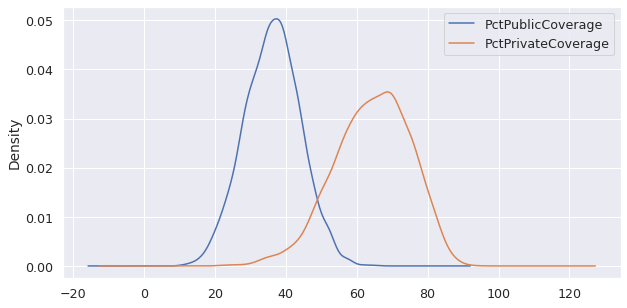

In [ ]:
df=pd.DataFrame(data,columns=['PctPublicCoverage','PctPrivateCoverage','TARGET_deathRate'])
df.plot(x='TARGET_deathRate',y=['PctPublicCoverage','PctPrivateCoverage'],kind='kde',figsize=(10,5))
plt.show()


*   The percent of residents with government provided health coverage is more in rate when compared to private health coverage with rescept to TARGET_deathRate



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


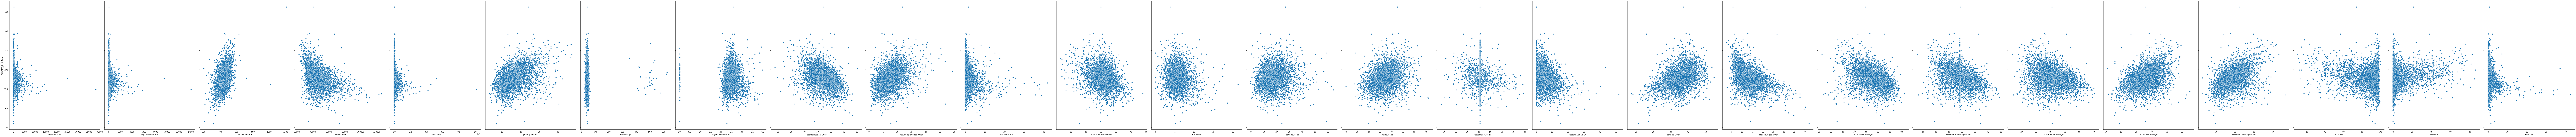

In [ ]:
sns.pairplot(data,x_vars=['avgAnnCount','avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent','MedianAge','AvgHouseholdSize','PctEmployed16_Over','PctUnemployed16_Over','PctOtherRace','PctMarriedHouseholds','BirthRate','PctNoHS18_24','PctHS18_24','PctSomeCol18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian'],y_vars='TARGET_deathRate',size=10,aspect=0.7)



*   We can observe some insights from the above scatterplot that
  * The columns incidenceRate, povertyPercent, PctHS18_24, PctHS25_Over, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone are  highly positive correlated with the target variable(TARGET_deathRate).
  * The Columns medIncome, PctEmpPrivCoverage, PctPrivateCoverage, PctPrivateCoverageAlone, PctBachDeg25_Over, PctEmployed16_Over, PctMarriedHouseholds are highly negative correlated with the target variable(TARGET_deathRate).
  * The other columns avgAnnCount, avgDeathsPerYear, popEst2015, MedianAge are having more no.of outliers.





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

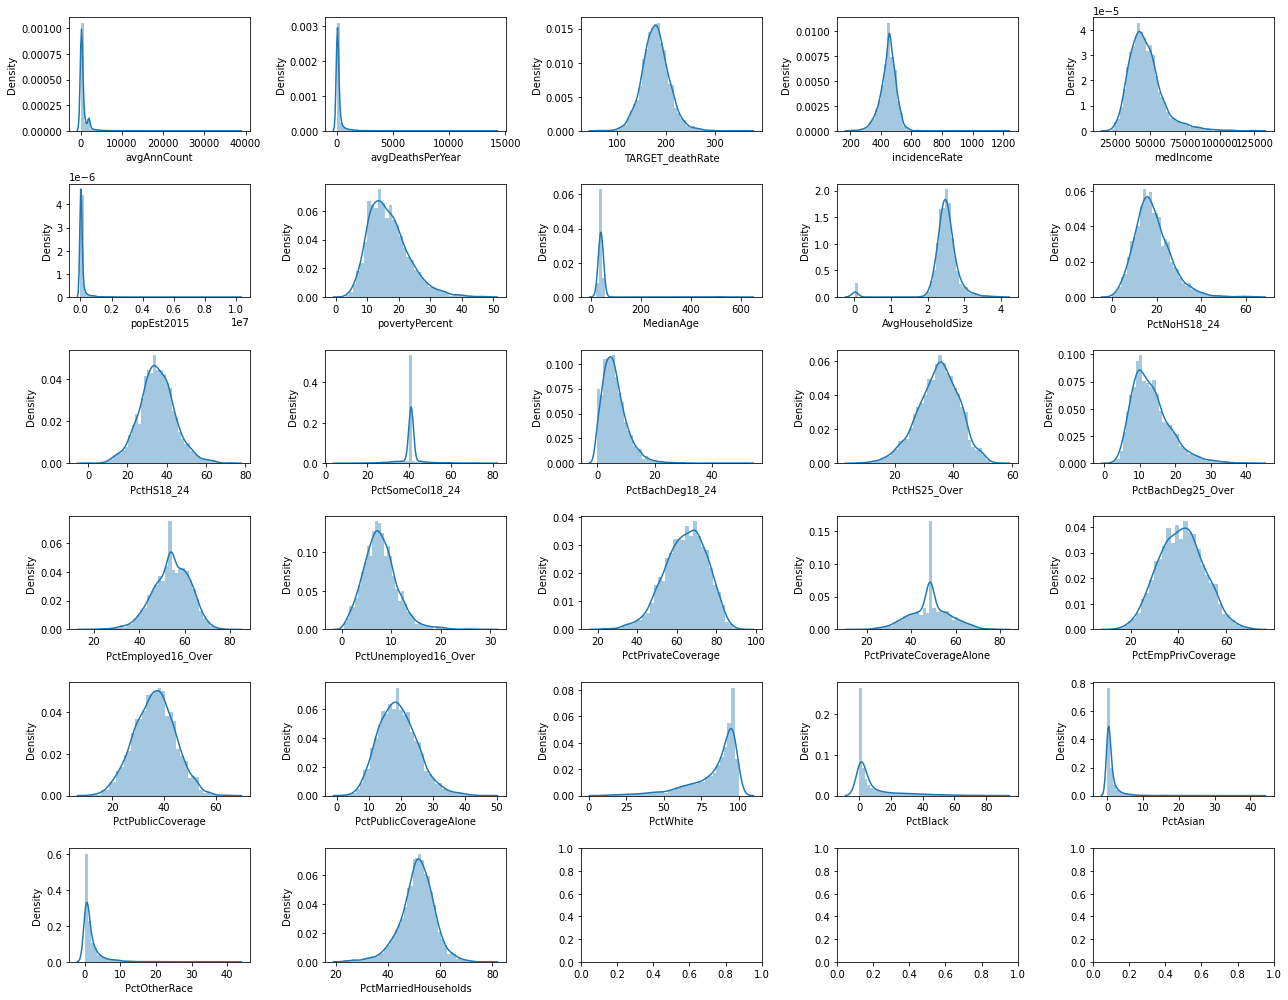

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(data.columns[:-1]):
  plot = sns.distplot(data[c] ,ax=axes[i])
plt.tight_layout()

*   Most of the features follow the normal distribution
*   PctWhite feature is left skewed
*   PctBlack, PctAsian, PctOtherRace, AvgAnnount, avgDeathsPerYear, popEst2015, MedianAge features are right skewed






**Heat Map**

In [ ]:
data.corr()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000          0.939408         -0.143532   
avgDeathsPerYear            0.939408          1.000000         -0.090715   
TARGET_deathRate           -0.143532         -0.090715          1.000000   
incidenceRate               0.073553          0.062690          0.449432   
medIncome                   0.269145          0.223207         -0.428615   
popEst2015                  0.926894          0.977634         -0.120073   
povertyPercent             -0.135694         -0.066918          0.429389   
MedianAge                  -0.024098         -0.024599          0.004375   
AvgHouseholdSize            0.064788          0.086161         -0.036905   
PctNoHS18_24               -0.143327         -0.136794          0.088463   
PctHS18_24                 -0.182054         -0.151418          0.261976   
PctSomeCol18_24             0.070159          0.063322         -0.094765   
PctBachDeg18_24             0.284176          0.259761         -0.287817   
PctHS25_Over               -0.311375         -0.295929          0.404589   
PctBachDeg25_Over           0.321021          0.293210         -0.485477   
PctEmployed16_Over          0.197981          0.125015         -0.397487   
PctUnemployed16_Over       -0.009016          0.069701          0.378412   
PctPrivateCoverage          0.132244          0.056183         -0.386066   
PctPrivateCoverageAlone     0.166674          0.112221         -0.326067   
PctEmpPrivCoverage          0.202349          0.160124         -0.267399   
PctPublicCoverage          -0.173548         -0.131687          0.404572   
PctPublicCoverageAlone     -0.093699         -0.027338          0.449358   
PctWhite                   -0.136501         -0.187159         -0.177400   
PctBlack                    0.031376          0.084607          0.257024   
PctAsian                    0.435071          0.443074         -0.186331   
PctOtherRace                0.209184          0.215149         -0.189894   
PctMarriedHouseholds       -0.106221         -0.160266         -0.293325   
BirthRate                  -0.034508         -0.074420         -0.087407   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.073553   0.269145    0.926894       -0.135694   
avgDeathsPerYear              0.062690   0.223207    0.977634       -0.066918   
TARGET_deathRate              0.449432  -0.428615   -0.120073        0.429389   
incidenceRate                 1.000000  -0.001036    0.026912        0.009046   
medIncome                    -0.001036   1.000000    0.235523       -0.788965   
popEst2015                    0.026912   0.235523    1.000000       -0.065299   
povertyPercent                0.009046  -0.788965   -0.065299        1.000000   
MedianAge                     0.018089  -0.013288   -0.025219       -0.029280   
AvgHouseholdSize             -0.118400   0.112065    0.109940        0.074308   
PctNoHS18_24                 -0.170762  -0.289383   -0.126582        0.288106   
PctHS18_24                    0.022644  -0.190006   -0.151821        0.094211   
PctSomeCol18_24               0.038442   0.101864    0.065207       -0.079355   
PctBachDeg18_24               0.046835   0.492810    0.248375       -0.387122   
PctHS25_Over                  0.121725  -0.471348   -0.311849        0.194361   
PctBachDeg25_Over            -0.038177   0.704928    0.297463       -0.531600   
PctEmployed16_Over            0.004622   0.676307    0.139571       -0.719972   
PctUnemployed16_Over          0.099979  -0.453108    0.050768        0.655148   
PctPrivateCoverage            0.105174   0.724175    0.052677       -0.822534   
PctPrivateCoverageAlone       0.098846   0.706956    0.121365       -0.682760   
PctEmpPrivCoverage            0.149825   0.747294    0.158650       -0.683100   
PctPublicCoverage             0.046109  -0.754822   -0.160066        0.651162   
PctPublicCoverageAlone        0.040812

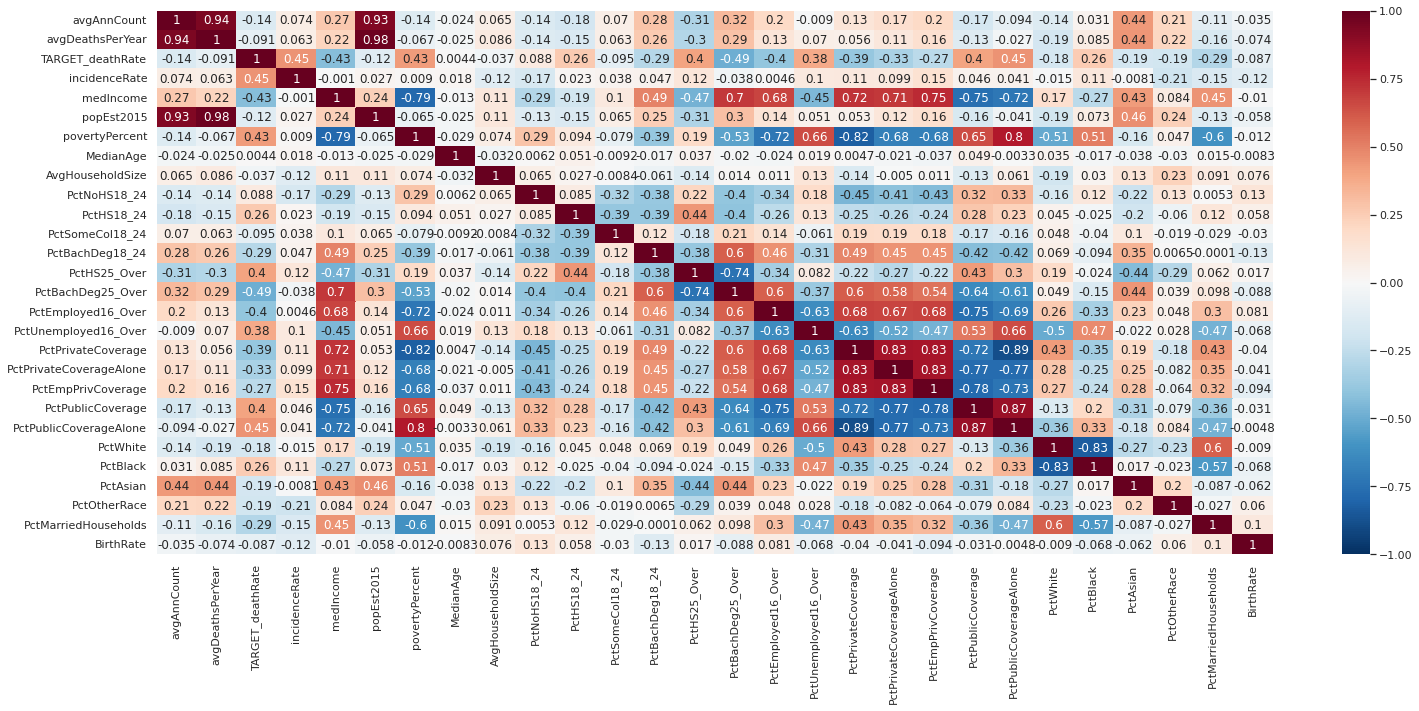

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

*   incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, are highly positively correlated with the target variable
*   Added to that, PctBlack is also positively correlated with the target variable
*   medianIncome, PctBatchDeg25_Over,PctEmpPrivCoverage, PctPrivateCoverage, PctPrivateCoverageAlone, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
*   Added to that PctBatchDeg18_24,PctWhite, PctAsian, PctOtherRace are also negatively correlated with the target variable





# PREDICTIVE ANALYSIS

## Linear Regression

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


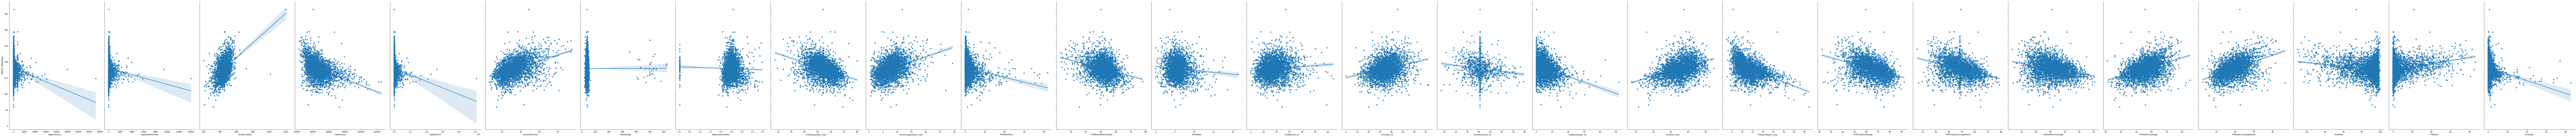

In [ ]:
sns.pairplot(data,x_vars=['avgAnnCount','avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent','MedianAge','AvgHouseholdSize','PctEmployed16_Over','PctUnemployed16_Over','PctOtherRace','PctMarriedHouseholds','BirthRate','PctNoHS18_24','PctHS18_24','PctSomeCol18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian'],y_vars='TARGET_deathRate',size=10,aspect=0.7,kind='reg')

In [ ]:
lm=smf.ols(formula='TARGET_deathRate~avgAnnCount+avgDeathsPerYear+incidenceRate+medIncome+popEst2015+povertyPercent+MedianAge+AvgHouseholdSize+PctEmployed16_Over+PctUnemployed16_Over+PctOtherRace+PctMarriedHouseholds+BirthRate+PctNoHS18_24+PctHS18_24+PctSomeCol18_24+PctBachDeg18_24+PctHS25_Over+PctBachDeg25_Over+PctPrivateCoverage+PctPrivateCoverageAlone+PctEmpPrivCoverage+PctPublicCoverage+PctPublicCoverageAlone+PctWhite+PctBlack+PctAsian',data=data).fit()
lm.params

Intercept                  146.370635
avgAnnCount                 -0.003020
avgDeathsPerYear             0.016562
incidenceRate                0.195937
medIncome                    0.000002
popEst2015                  -0.000015
povertyPercent               0.337333
MedianAge                   -0.003523
AvgHouseholdSize            -0.211487
PctEmployed16_Over          -0.176489
PctUnemployed16_Over         0.128499
PctOtherRace                -0.915379
PctMarriedHouseholds        -0.304541
BirthRate                   -0.602788
PctNoHS18_24                -0.130987
PctHS18_24                   0.242208
PctSomeCol18_24              0.014941
PctBachDeg18_24             -0.046309
PctHS25_Over                 0.322356
PctBachDeg25_Over           -1.270369
PctPrivateCoverage          -0.442726
PctPrivateCoverageAlone      0.051726
PctEmpPrivCoverage           0.232126
PctPublicCoverage           -0.399173
PctPublicCoverageAlone       0.504074
PctWhite                    -0.117309
PctBlack    

In [ ]:
lm.rsquared

0.5131147838203776

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     117.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:43:48   Log-Likelihood:                -13353.
No. Observations:                3047   AIC:                         2.676e+04
Df Residuals:                    3019   BIC:                         2.693e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 146.3706     15.674      9.339      0.000     115.638     177.103
avgAnnCount                -0.0030      0.001     -3.893      0.000      -0.005      -0.001
avgDeathsPerYear            0.0166      0.004      4.232      0.000       0.009       0.024
incidenceRate               0.1959      0.007     27.068      0.000       0.182       0.210
medIncome                1.711e-06   7.93e-05      0.022      0.983      -0.000       0.000
popEst2015              -1.468e-05    5.5e-06     -2.669      0.008   -2.55e-05    -3.9e-06
povertyPercent              0.3373      0.158      2.131      0.033       0.027       0.648
MedianAge                  -0.0035      0.008     -0.449      0.654      -0.019       0.012
AvgHouseholdSize           -0.2115      0.943     -0.224      0.823      -2.061       1.638
PctEmployed16_Over         -0.1765      0.088     -1.997      0.046      -0.350      -0.003
PctUnemployed16_Over        0.1285      0.166      0.776      0.438      -0.196       0.453
PctOtherRace               -0.9154      0.125     -7.343      0.000      -1.160      -0.671
PctMarriedHouseholds       -0.3045      0.093     -3.285      0.001      -0.486      -0.123
BirthRate                  -0.6028      0.190     -3.164      0.002      -0.976      -0.229
PctNoHS18_24               -0.1310      0.058     -2.240      0.025      -0.246      -0.016
PctHS18_24                  0.2422      0.053      4.606      0.000       0.139       0.345
PctSomeCol18_24             0.0149      0.074      0.202      0.840      -0.130       0.160
PctBachDeg18_24            -0.0463      0.109     -0.424      0.671      -0.260       0.168
PctHS25_Over                0.3224      0.096      3.363      0.001       0.134       0.510
PctBachDeg25_Over          -1.2704      0.153     -8.309      0.000      -1.570      -0.971
PctPrivateCoverage         -0.4427      0.138     -3.220      0.001      -0.712      -0.173
PctPrivateCoverageAlone     0.0517      0.085      0.608      0.543      -0.115       0.218
PctEmpPrivCoverage          0.2321      0.104      2.232      0.026       0.028       0.436
PctPublicCoverage          -0.3992      0.170     -2.344      0.019      -0.733      -0.065
PctPublicCoverageAlone      0.5041      0.247      2.044      0.041       0.020       0.988
PctWhite                   -0.1173      0.057     -2.057      0.040      -0.229      -0.005
PctBlack                   -0.0793      0.054     -1.456      0.145      -0.186       0.027
PctAsian                   -0.0281      0.190     -0.148      0.882      -0.400       0.344
==============================================================================
Omnibus:                      201.687   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              88

In [ ]:
x=data[['avgAnnCount','avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent','MedianAge','AvgHouseholdSize','PctEmployed16_Over','PctUnemployed16_Over','PctOtherRace','PctMarriedHouseholds','BirthRate','PctNoHS18_24','PctHS18_24','PctSomeCol18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian']]
y=data.TARGET_deathRate
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred=lm1.predict(x_test)
print((metrics.mean_absolute_error(y_test,y_pred)))

14.48989034857609


In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

142.75555611288928
[-2.71703443e-03  1.48388377e-02  2.01051848e-01  4.93729220e-05
 -1.34994783e-05  3.90256486e-01 -7.02201666e-03 -1.07496964e+00
 -1.03482460e-01  7.92318180e-02 -7.67762137e-01 -2.33523968e-01
 -4.05382905e-01 -1.82344839e-01  2.41012536e-01 -2.74901737e-02
 -1.14997247e-01  2.88873311e-01 -1.22644847e+00 -5.56700447e-01
  3.43155621e-02  3.09828635e-01 -1.81875619e-01  2.52718503e-01
 -1.42911867e-01 -1.01349596e-01 -1.27735758e-01]


In [ ]:
lm1.score(x_test,y_test)

0.554148146574899

In [ ]:
x= data.drop("TARGET_deathRate", axis=1)
y=data["TARGET_deathRate"]
x.head

<bound method NDFrame.head of       avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0     1397.000000               469     489.800000      61898      260131   
1      173.000000                70     411.600000      48127       43269   
2      102.000000                50     349.700000      49348       21026   
3      427.000000               202     430.400000      44243       75882   
4       57.000000                26     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684                15     453.549422      46961        6343   
3043  1962.667684                43     453.549422      48609       37118   
3044  1962.667684                46     453.549422      51144       34536   
3045  1962.667684                52     453.549422      50745       25609   
3046  1962.667684                48     453.549422      41193       37030   

      povertyPercent  MedianAge  AvgHousehold

In [ ]:
y.head

<bound method NDFrame.head of 0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64>

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

1582    186.5
2367    152.5
2091    174.2
343     207.6
2661    192.0
        ...  
2322     94.4
1532    202.5
1233    180.8
542     195.2
2272    171.5
Name: TARGET_deathRate, Length: 762, dtype: float64

In [ ]:
#Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
y_pred

array([187.96744623, 166.09960635, 166.72564413, ..., 173.12928529,
       194.87127355, 171.82352649])

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)

15.396768831236527


In [ ]:
r2_score(y_test,y_pred)

0.46739078005038137

##Boosting

In [ ]:
#Gradient Boosting
regressor = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42
)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
gb=mean_absolute_error(y_test, y_pred)
print(gb)

11.738550600273754


In [ ]:
#Extreme Gradient Boosting
clf = XGBRegressor(n_estimators=1000,
                   learning_rate=0.1,
                   max_depth=3,
                   random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
eg=mean_absolute_error(y_test, y_pred)
print(eg)

[12:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
11.775064202749293


In [ ]:
#Adaptive Boosting
adaclf = AdaBoostRegressor( 
                           n_estimators=1000,
                           learning_rate=0.1,
                           random_state=42)
    
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
ab=mean_absolute_error(y_test, y_pred_1)
print(ab)

15.960844803603948


##Bagging

In [ ]:
#Bagging
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=1000, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(x_test))

print("The mean abs error (MAE) on test set: {:.4f}".format(mae))

The mean abs error (MAE) on test set: 13.9974


## Neural Networks

In [ ]:
#imports
%matplotlib inline
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(27),
                            tf.keras.layers.Dense(26),
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(7),
                           
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

34/34 [==============================] - 0s 2ms/step - loss: 18.8047 - mae: 18.8047


[18.804658889770508, 18.804658889770508]

In [ ]:
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 26)                728       
                                                                 
 dense_2 (Dense)             (None, 13)                351       
                                                                 
 dense_3 (Dense)             (None, 7)                 98        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1,941
Trainable params: 1,941
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

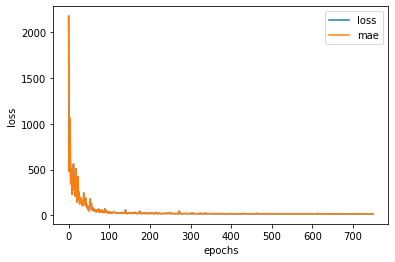

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")